---
#Actividad Guiada 3

## Maria Alejandra Aranguren

###08 MBID- Visualización de datos
---

---








In [2]:
# Importar los modulos

import pandas as pd

import io

import requests

import seaborn as sns

import timeit

import matplotlib.pyplot as plt

In [3]:
# Cargar el dataset


url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"

s=requests.get(url).content

titanic=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [4]:
# Informacion del dataset

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [5]:
# Renombrar columnas

titanic.rename(columns={'class':'clase'},inplace=True)

titanic.rename(columns={'fare':'tarifa'},inplace=True)


# Mostrar valores unicos (clases)

titanic.clase.unique()


# Primeras 5 filas

titanic.head()

# Añadir columna is_old, is_baby

def is_old_func(row):

  return row['age'] > 60


titanic['is_old'] = titanic.apply(is_old_func, axis='columns')


titanic.eval( ' is_baby = age < 15' , inplace = True)


In [6]:
titanic.shape

(891, 17)

In [7]:
# Columna class_num

def class_num_func(row):

  Clase={'Third':3,'First':1,'Second':2}

  return Clase[row.clase]


titanic['class_num'] = titanic.apply(class_num_func, axis='columns')

# imprimir

titanic.head()


,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby,class_num
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False,False,3
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False,False,3
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False,False,3


In [8]:
# Query

titanic[(titanic.sex == 'female') & (titanic['clase'].isin(['First','Third'])) & (titanic.age > 45) & (titanic.survived == 0)]

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby,class_num
132,0,3,female,47.0,1,0,14.5000,S,Third,woman,False,NaN,Southampton,no,False,False,False,3
177,0,1,female,50.0,0,0,28.7125,C,First,woman,False,C,Cherbourg,no,True,False,False,1
736,0,3,female,48.0,1,3,34.3750,S,Third,woman,False,NaN,Southampton,no,False,False,False,3


<Axes: xlabel='pclass', ylabel='count'>

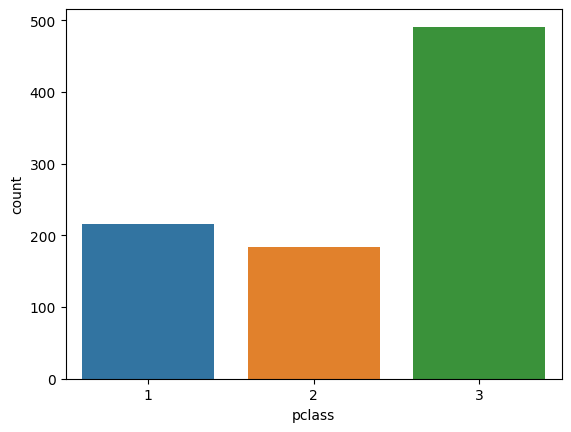

In [9]:
# Distribucion de la variable clase

sns.countplot(x="pclass", data=titanic)

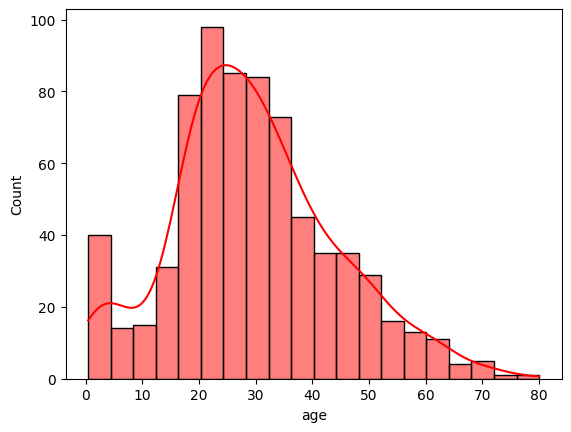

In [10]:
# Distribucion basado en histogramas por la edad

sns.histplot(titanic.age.dropna(), kde=True,color='r')

plt.show()

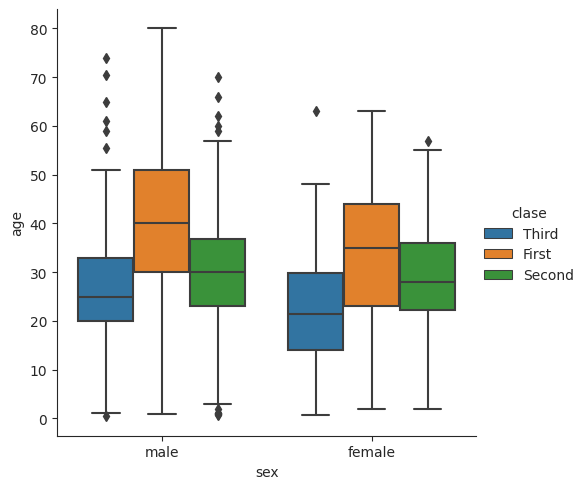

In [11]:
# Boxplot edad vs sexo

with sns.axes_style(style='ticks'):

  ax = sns.catplot(data=titanic, x="sex", y="age", hue="clase", kind="box")


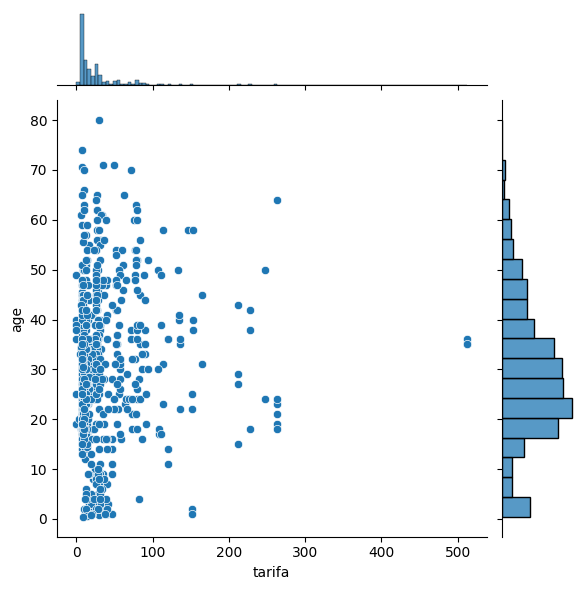

In [12]:
# Distribucion cruzada

sns.jointplot(x="tarifa", y="age", data=titanic)

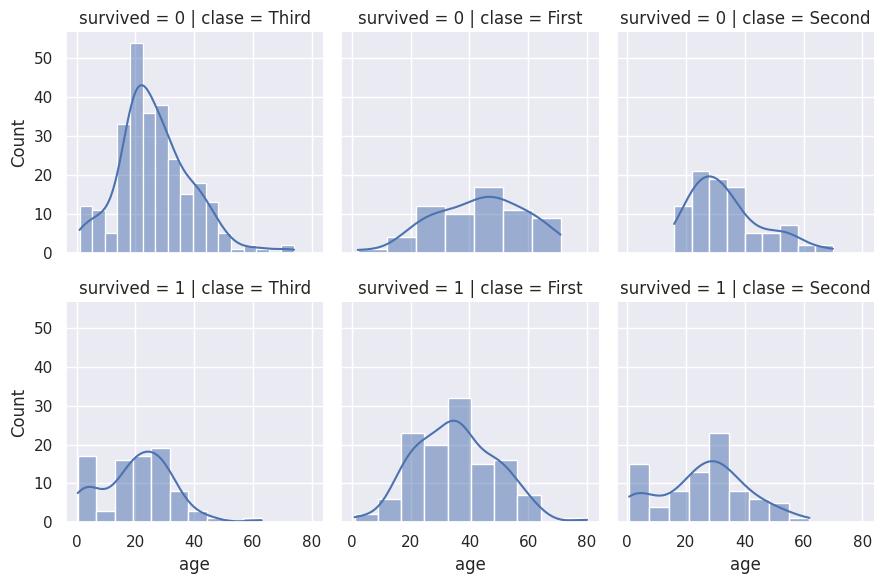

In [13]:
# Matriz de gráficos
sns.set(font_scale=1)

g = sns.FacetGrid(titanic, row='survived',col='clase')

g.map(sns.histplot, "age", kde=True)

plt.show()

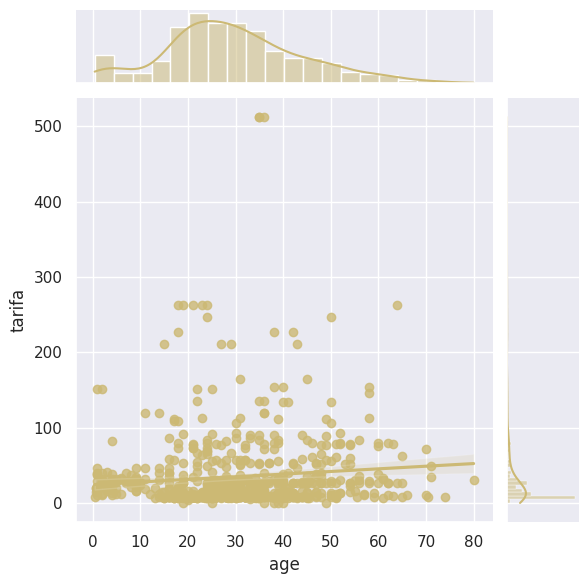

In [14]:
# Diamagra de dispersión

sns.jointplot(data=titanic, x='age', y='tarifa', kind='reg', color='y')

plt.show()

<ipython-input-15-9a4d7b10f85d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tc = titanic.corr()


Text(0.5, 1.0, 'titanic.corr()')

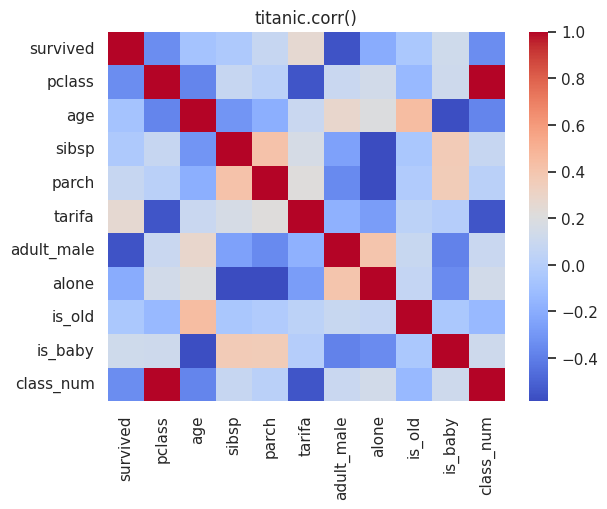

In [15]:
# Diagrama de correlaciones

tc = titanic.corr()

sns.heatmap(tc,cmap='coolwarm')

plt.title('titanic.corr()')

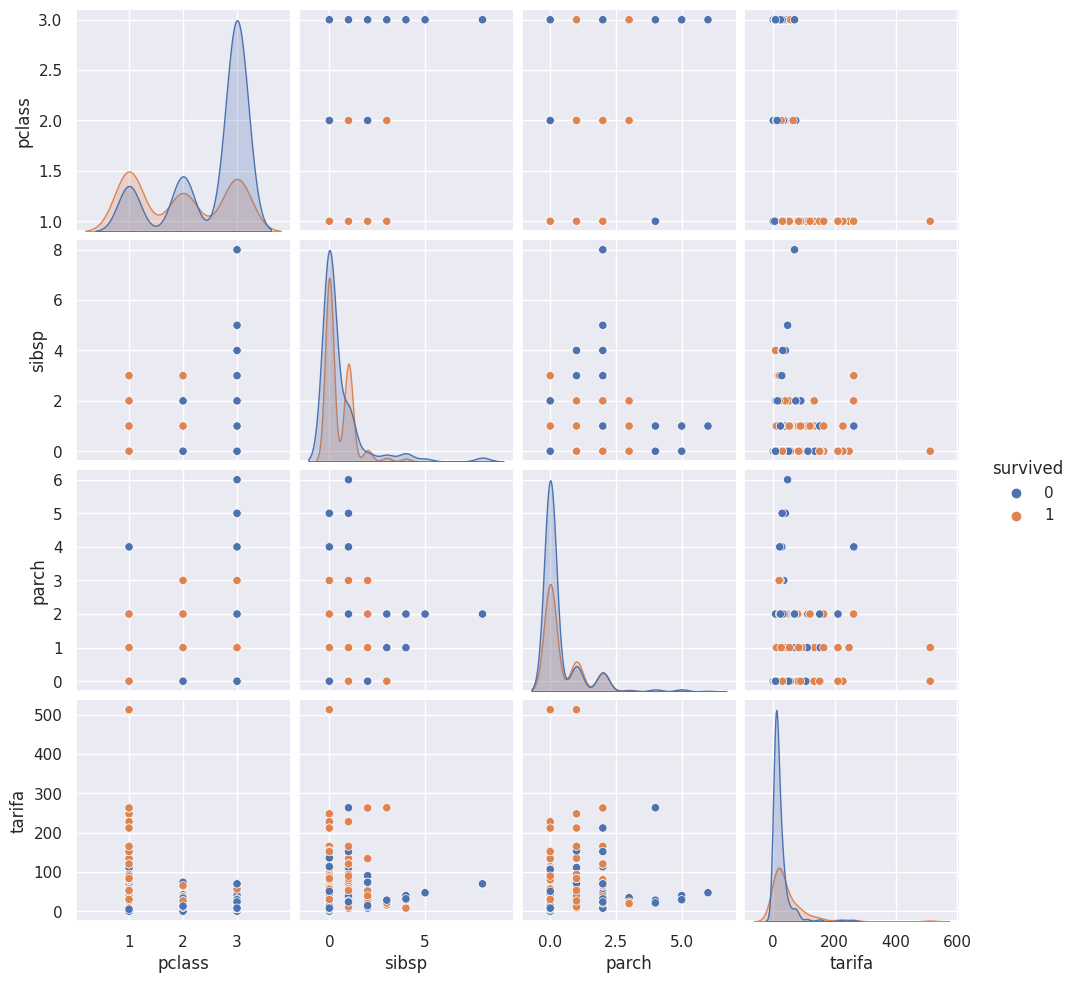

In [16]:
#Define un subconjuto de datos con las variables numéricas
titanic_num =titanic[['survived','pclass','sibsp','parch','tarifa']]
#Hace una matriz de diagramas de dispersión de parejas de variables.
sns.pairplot(titanic_num, hue="survived")
plt.show()

---
#Ampliacion Práctica

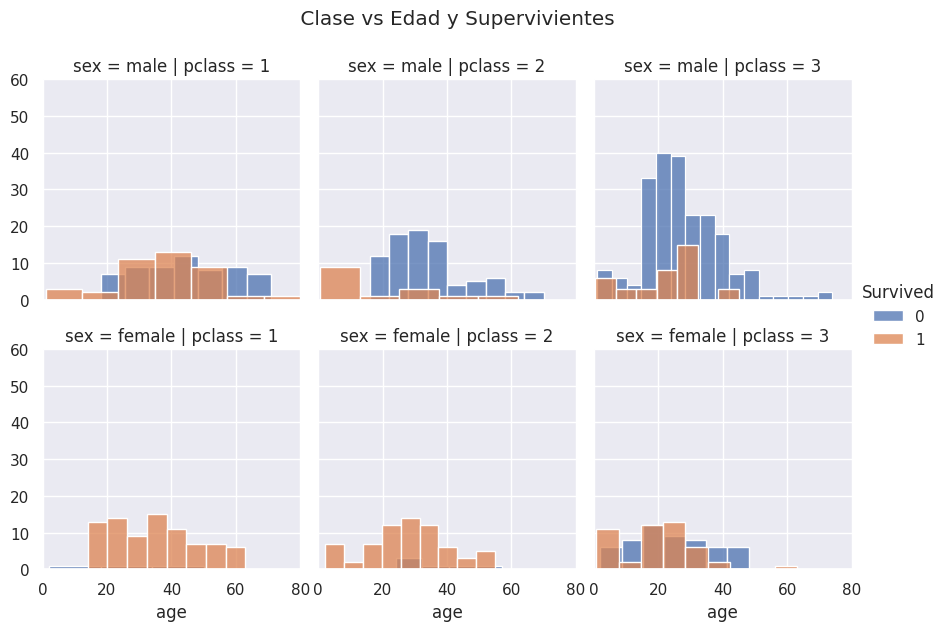

In [17]:
# Diagrama de distribucion de clase/edad y supervivientes
# Se configura para que sea identica a la de la imagen

sns.set(font_scale=1)

g = sns.FacetGrid(titanic, row='sex',col='pclass',hue="survived")

g.map(sns.histplot, "age")
g.add_legend(title="Survived")

plt.suptitle(" Clase vs Edad y Supervivientes",y=1.05)

for ax in g.axes.flat:
    ax.set(ylim=(0, 60))
    ax.set(xlim=(0, 80))
    ax.set_ylabel("")

plt.show()

In [18]:
# Query

titanic[(titanic.sex == 'male')  & (titanic.age > 40) & (titanic.survived == 0) & (titanic.pclass==3)&(titanic.survived==0)]

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby,class_num
94,0,3,male,59.0,0,0,7.2500,S,Third,man,True,NaN,Southampton,no,True,False,False,3
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True,True,False,3
129,0,3,male,45.0,0,0,6.9750,S,Third,man,True,NaN,Southampton,no,True,False,False,3
152,0,3,male,55.5,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False,False,3
153,0,3,male,40.5,0,2,14.5000,S,Third,man,True,NaN,Southampton,no,False,False,False,3
160,0,3,male,44.0,0,1,16.1000,S,Third,man,True,NaN,Southampton,no,False,False,False,3
197,0,3,male,42.0,0,1,8.4042,S,Third,man,True,NaN,Southampton,no,False,False,False,3
203,0,3,male,45.5,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True,False,False,3
222,0,3,male,51.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False,False,3
280,0,3,male,65.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True,True,False,3
